# Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
train_data = pd.read_csv('train_tweets.csv')

In [4]:
from pandas_profiling import ProfileReport

In [5]:
pf=ProfileReport(train_data,title="DataSet Report")

In [6]:
pf.to_widgets()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# Cleaning the data

In [7]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [8]:
import re
## example ## 
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ","ouch...junior is angryð#got7 #junior #yugyo..., @user")

'ouch   junior is angry     got7  junior  yugyo      '

In [9]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [10]:
train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)

In [11]:
train_data.head(10)

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr8


In [12]:
drop_features(['id','tweet'],train_data)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             31962 non-null  int64 
 1   processed_tweets  31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(train_data["processed_tweets"],train_data["label"], test_size = 0.2, random_state = 42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [17]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer()

In [22]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [23]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 33735)
(25569, 33735)


In [24]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [25]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 33735)
(6393, 33735)


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [27]:
predLR=model1.predict(x_test_tfidf)

In [28]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predLR)
print(c_m)


[[5924   13]
 [ 317  139]]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predLR)

0.9483810417644298

# Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [31]:
predDT=model2.predict(x_test_tfidf)

In [32]:
c_m = confusion_matrix(y_test,predDT)
print(c_m)

[[5781  156]
 [ 180  276]]


In [33]:
accuracy_score(y_test,predDT)

0.9474425152510558

# Support Vector Machines

In [45]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train_tfidf,y_train)

SVC()

In [53]:
predSVC=model3.predict(x_test_tfidf)

In [60]:
c_m = confusion_matrix(y_test,predSVC)
print(c_m)


[[5924   13]
 [ 257  199]]


In [37]:
accuracy_score(y_test,predSVC)

0.9577663068981699

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
predRF = model4.predict(x_test_tfidf)

In [40]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predRF)
c_m


array([[5900,   37],
       [ 213,  243]], dtype=int64)

In [41]:
accuracy_score(y_test,predRF)

0.9608947286094166

In [42]:
tp,fn,fp,tn = c_m[0][0],c_m[0][1],c_m[1][0],c_m[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.9937678962438943
precision =  0.9651562244397186
F1_score =  0.979253112033195


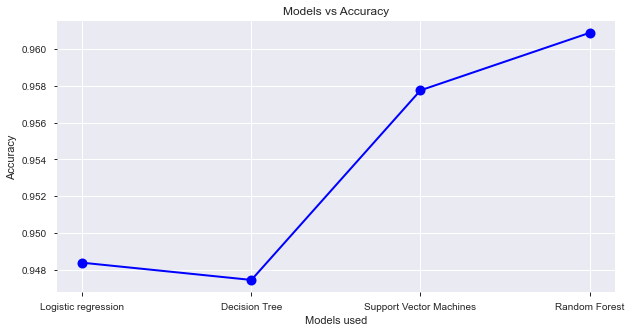

In [52]:
mod_accuracy=[accuracy_score(y_test,predLR),accuracy_score(y_test,predDT),accuracy_score(y_test,predSVC),accuracy_score(y_test,predRF)]
models=["Logistic regression","Decision Tree","Support Vector Machines","Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

# Preparing test data

In [79]:
test_data = pd.read_csv('../tee.csv')

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   id          100 non-null    int64 
 2   tweet       100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [81]:
test_data.columns

Index(['Unnamed: 0', 'id', 'tweet'], dtype='object')

In [82]:
test_data['processed_tweet'] = test_data['tweet'].apply(process_tweet)

In [83]:
test_data.head()

,Unnamed: 0,id,tweet,processed_tweet
0,0,0,#Repost chemoisoverrated\n#SaveYourself #wakeu...,repost chemoisoverrated saveyourself wakeup 91...
1,1,1,Publish New Compose Message! #hello 1597784891...,publish new compose message hello 159778489102...
2,2,2,#HELLO - @EJONES_MUSIC x @pharoahemonch \n\nht...,hello music x https t co 2ianjw3jkd tidal dead...
3,3,3,Psssst @evedagny1 I am a cute hedgehog :P I tw...,psssst i am a cute hedgehog p i tweet about ho...
4,4,4,I often scribble on little scraps of paper flo...,i often scribble on little scraps of paper flo...


In [84]:
drop_features(['tweet'],test_data)

In [85]:
train_counts = count_vect.fit_transform(train_data['processed_tweets'])
test_counts = count_vect.transform(test_data['processed_tweet'])

In [86]:
print(train_counts.shape)
print(test_counts.shape)

(31962, 38763)
(100, 38763)


In [87]:
train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)

In [88]:
print(train_tfidf.shape)
print(test_tfidf.shape)

(31962, 38763)
(100, 38763)


In [89]:
model4.fit(train_tfidf,train_data['label'])

RandomForestClassifier(n_estimators=200)

In [90]:
predictions = model4.predict(test_tfidf)

In [91]:
final_result = pd.DataFrame({'id':test_data['id'],'label':predictions})
final_result

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
95,95,0
96,96,0
97,97,0
98,98,0


In [77]:
final_result.to_csv('output2.csv',index=False)